In [1]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt

C:\Users\arabtech\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\arabtech\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\arabtech\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\arabtech\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [3]:
df=pd.read_excel('Kansai data-20210530/doubleYoudata.xlsm',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,NaN,NaN,NaN,RELATIVE,NaN,ABSOLUE,NaN,ABSOLUE,NaN,RELATIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,MOOD,NaN,PSYCHIC ACTIVITY,NaN,PSYCHIC ACTIVITY,NaN,MOOD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,deviation,NaN,asolute deviation,NaN,Rolling cumulative 10 secondes,NaN,Rolling cumulative 10 secondes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09:09:00:718,22.74,09:09:00:718,NaN,09:09:00:718,0,09:09:00:718,NaN,09:09:00:718,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09:09:01:749,22.74,09:09:01:749,0,09:09:01:749,0,09:09:01:749,NaN,09:09:01:749,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[35:3572 ,:13]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
35,09:09:33:716,22.72,09:09:33:716,0,09:09:33:716,0,09:09:33:716,NaN,09:09:33:716,-0.01,09:09:33:716,0,0
36,09:09:34:747,22.72,09:09:34:747,0,09:09:34:747,0,09:09:34:747,NaN,09:09:34:747,-0.01,09:09:34:747,0,0
37,09:09:35:778,22.72,09:09:35:778,0,09:09:35:778,0,09:09:35:778,NaN,09:09:35:778,-0.01,09:09:35:778,0,0
38,09:09:36:810,22.72,09:09:36:810,0,09:09:36:810,0,09:09:36:810,NaN,09:09:36:810,-0.01,09:09:36:810,0,0
39,09:09:37:841,22.72,09:09:37:841,0,09:09:37:841,0,09:09:37:841,NaN,09:09:37:841,-0.01,09:09:37:841,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3567,10:10:14:848,22.67,10:10:14:848,0,10:10:14:848,0,10:10:14:848,0,10:10:14:848,NaN,10:10:14:848,0,0
3568,10:10:15:879,22.67,10:10:15:879,0,10:10:15:879,0,10:10:15:879,0,10:10:15:879,NaN,10:10:15:879,0,0
3569,10:10:16:911,22.67,10:10:16:911,0,10:10:16:911,0,10:10:16:911,0,10:10:16:911,NaN,10:10:16:911,0,0
3570,10:10:17:942,22.67,10:10:17:942,0,10:10:17:942,0,10:10:17:942,0,10:10:17:942,NaN,10:10:17:942,0,0


In [5]:
df = df.drop(columns= [2, 4, 6, 8, 10])

In [6]:
df = df.rename(columns = {0:"time",1:"Heartbeat", 3:"RMD", 5:"PSYCHIC ACTIVITY asolute deviation", 7:"Rolling cumulative 10 secondes",9:"Relative Mood Rolling cumulative 10 secondes", 11:"positive", 12:"negative"})

In [7]:
df = df.dropna()

In [8]:
df.head()

,time,Heartbeat,RMD,PSYCHIC ACTIVITY asolute deviation,Rolling cumulative 10 secondes,Relative Mood Rolling cumulative 10 secondes,positive,negative
158,09:11:40:525,22.62,0,0,0.01,-0.01,0,0
159,09:11:41:556,22.62,0,0,0.01,-0.01,0,0
160,09:11:42:587,22.62,0,0,0.01,-0.01,0,0
161,09:11:43:619,22.62,0,0,0.01,-0.01,0,0
162,09:11:44:650,22.61,-0.01,0.01,0.02,-0.02,0,0.01


In [9]:
df["Heartbeat"] = pd.to_numeric(df.Heartbeat, errors = 'coerce')

In [10]:
df["RMD"] = pd.to_numeric(df.RMD, errors = 'coerce')

In [11]:
df["PSYCHIC ACTIVITY asolute deviation"] = pd.to_numeric(df['PSYCHIC ACTIVITY asolute deviation'], errors = 'coerce')

In [12]:
df["Rolling cumulative 10 secondes"] = pd.to_numeric(df['Rolling cumulative 10 secondes'], errors = 'coerce')
df["Relative Mood Rolling cumulative 10 secondes"] = pd.to_numeric(df['Relative Mood Rolling cumulative 10 secondes'], errors = 'coerce')
df["positive"] = pd.to_numeric(df.positive, errors = 'coerce')
df["negative"] = pd.to_numeric(df.negative, errors = 'coerce')

In [13]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S:%f')
df

,time,Heartbeat,RMD,PSYCHIC ACTIVITY asolute deviation,Rolling cumulative 10 secondes,Relative Mood Rolling cumulative 10 secondes,positive,negative
158,1900-01-01 09:11:40.525,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
159,1900-01-01 09:11:41.556,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
160,1900-01-01 09:11:42.587,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
161,1900-01-01 09:11:43.619,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
162,1900-01-01 09:11:44.650,22.61,-0.01,0.01,0.02,-0.02,0.0,0.01
...,...,...,...,...,...,...,...,...
3148,1900-01-01 10:03:02.723,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3149,1900-01-01 10:03:03.755,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3150,1900-01-01 10:03:04.786,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3151,1900-01-01 10:03:05.817,22.79,0.00,0.00,0.01,-0.01,0.0,0.00


In [14]:
df['time']=df['time'].astype('str')
df['time'] = df['time'].str.replace('1900-01-01','')

In [15]:
df

,time,Heartbeat,RMD,PSYCHIC ACTIVITY asolute deviation,Rolling cumulative 10 secondes,Relative Mood Rolling cumulative 10 secondes,positive,negative
158,09:11:40.525,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
159,09:11:41.556,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
160,09:11:42.587,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
161,09:11:43.619,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
162,09:11:44.650,22.61,-0.01,0.01,0.02,-0.02,0.0,0.01
...,...,...,...,...,...,...,...,...
3148,10:03:02.723,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3149,10:03:03.755,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3150,10:03:04.786,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3151,10:03:05.817,22.79,0.00,0.00,0.01,-0.01,0.0,0.00


In [16]:
df['time'] = pd.to_timedelta(df['time'] )

In [17]:
df["Heartbeat"].describe()

count    2995.000000
mean       23.307259
std         0.510327
min        22.150000
25%        22.940000
50%        23.450000
75%        23.760000
max        23.880000
Name: Heartbeat, dtype: float64

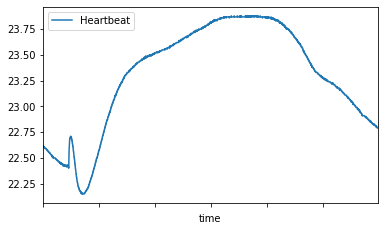

In [18]:
lines = df.plot.line(x='time', y='Heartbeat')

In [19]:
df

,time,Heartbeat,RMD,PSYCHIC ACTIVITY asolute deviation,Rolling cumulative 10 secondes,Relative Mood Rolling cumulative 10 secondes,positive,negative
158,09:11:40.525000,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
159,09:11:41.556000,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
160,09:11:42.587000,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
161,09:11:43.619000,22.62,0.00,0.00,0.01,-0.01,0.0,0.00
162,09:11:44.650000,22.61,-0.01,0.01,0.02,-0.02,0.0,0.01
...,...,...,...,...,...,...,...,...
3148,10:03:02.723000,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3149,10:03:03.755000,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3150,10:03:04.786000,22.79,0.00,0.00,0.02,-0.02,0.0,0.00
3151,10:03:05.817000,22.79,0.00,0.00,0.01,-0.01,0.0,0.00


In [20]:
#############################################################################################################################################

In [21]:
df = pd.read_csv('Kansai data-20210530/20210324_1811_KANSEI_test.csv')
df.head()

,Timestamp,Time,Like,Interest,Concentration,Calmness,Stress,Noise,Comment,Comment2
0,2021-0324 17:09:00.418,0,45,54,29,35,77,0,NaN,NaN
1,2021-0324 17:09:01.412,1,53,46,32,35,72,0,NaN,NaN
2,2021-0324 17:09:02.493,2,45,37,35,33,82,0,NaN,NaN
3,2021-0324 17:09:03.468,3,52,36,36,28,71,0,NaN,NaN
4,2021-0324 17:09:04.460,4,55,35,34,22,51,0,NaN,NaN


In [22]:
df = df.drop(['Comment'], axis = 1)
df = df.drop(['Comment2'],axis = 1)
df.head()

,Timestamp,Time,Like,Interest,Concentration,Calmness,Stress,Noise
0,2021-0324 17:09:00.418,0,45,54,29,35,77,0
1,2021-0324 17:09:01.412,1,53,46,32,35,72,0
2,2021-0324 17:09:02.493,2,45,37,35,33,82,0
3,2021-0324 17:09:03.468,3,52,36,36,28,71,0
4,2021-0324 17:09:04.460,4,55,35,34,22,51,0


In [23]:
df.set_index('Timestamp',inplace=True)

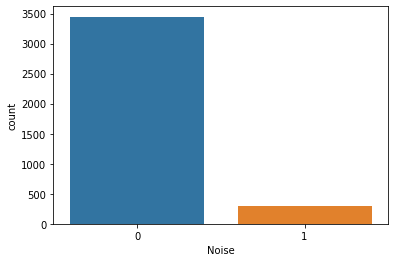

In [24]:
ax = sns.countplot(x="Noise", data=df)

In [25]:
df.head()

,Time,Like,Interest,Concentration,Calmness,Stress,Noise
Timestamp,,,,,,,
2021-0324 17:09:00.418,0,45,54,29,35,77,0
2021-0324 17:09:01.412,1,53,46,32,35,72,0
2021-0324 17:09:02.493,2,45,37,35,33,82,0
2021-0324 17:09:03.468,3,52,36,36,28,71,0
2021-0324 17:09:04.460,4,55,35,34,22,51,0


In [26]:
columns_to_be_encoded=df.columns

In [27]:
df.columns

Index(['Time', 'Like', 'Interest', 'Concentration', 'Calmness', 'Stress',
       'Noise'],
      dtype='object')

In [28]:
list(columns_to_be_encoded)

['Time', 'Like', 'Interest', 'Concentration', 'Calmness', 'Stress', 'Noise']

In [29]:
df_majority = df[df['Noise']==0]
df_minority = df[df['Noise']==1]
df_minority_oversampled = resample(df_minority, replace=True, n_samples=3447, random_state=0)
df_oversampled = pd.concat([df_majority, df_minority_oversampled])
df_oversampled['Noise'].value_counts()

1    3447
0    3447
Name: Noise, dtype: int64

In [30]:
X = df_oversampled.iloc[:,:-1].values

In [31]:
X

array([[   0,   45,   54,   29,   35,   77],
       [   1,   53,   46,   32,   35,   72],
       [   2,   45,   37,   35,   33,   82],
       ...,
       [3544,   44,   39,   40,   42,   53],
       [ 275,   63,   35,   29,   51,   57],
       [ 882,   64,   44,   44,   18,   65]], dtype=int64)

In [32]:
y = df_oversampled.iloc[:,6:7].values
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [33]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, y, test_size=0.3)

In [34]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [35]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [36]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy(name='accuracy'),
              keras.metrics.Precision(name='precision'),
              keras.metrics.Recall(name='recall'),
               tf.keras.metrics.AUC(name='auc')])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [37]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val),
          )

Train on 4825 samples, validate on 1034 samples
Epoch 1/20
4825/4825 [==============================] - 1s 219us/sample - loss: 350.7952 - accuracy: 0.5101 - precision: 0.5029 - recall: 0.9209 - auc: 0.5175 - val_loss: 0.6871 - val_accuracy: 0.5648 - val_precision: 0.5597 - val_recall: 0.9736 - val_auc: 0.5204
Epoch 2/20
4825/4825 [==============================] - 1s 126us/sample - loss: 0.6867 - accuracy: 0.5144 - precision: 0.5050 - recall: 0.9699 - auc: 0.5160 - val_loss: 0.6871 - val_accuracy: 0.5658 - val_precision: 0.5599 - val_recall: 0.9789 - val_auc: 0.5207
Epoch 3/20
4825/4825 [==============================] - 1s 133us/sample - loss: 0.6851 - accuracy: 0.5142 - precision: 0.5049 - recall: 0.9703 - auc: 0.5177 - val_loss: 0.6868 - val_accuracy: 0.5648 - val_precision: 0.5594 - val_recall: 0.9789 - val_auc: 0.5186
Epoch 4/20
4825/4825 [==============================] - 1s 130us/sample - loss: 0.6841 - accuracy: 0.5132 - precision: 0.5043 - recall: 0.9736 - auc: 0.5107 - val_l

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                224       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,313
Trainable params: 1,313
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.evaluate(X_test, Y_test)[1]

1035/1035 [==============================] - 0s 119us/sample - loss: 0.6776 - accuracy: 0.4957 - precision: 0.4841 - recall: 0.9959 - auc: 0.5210


0.49565217

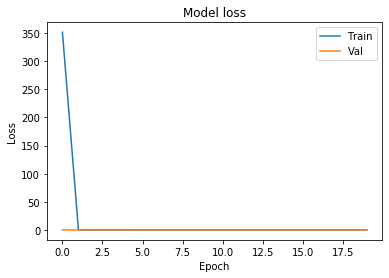

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

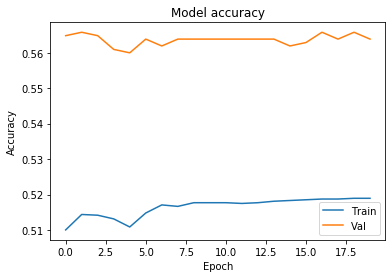

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [42]:
model_2 = Sequential([
    Dense(100, activation='relu', input_shape=(6,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy(name='accuracy'),
              keras.metrics.Precision(name='precision'),
              keras.metrics.Recall(name='recall'),
               tf.keras.metrics.AUC(name='auc')])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=25,
          validation_data=(X_val, Y_val))

Train on 4825 samples, validate on 1034 samples
Epoch 1/25
4825/4825 [==============================] - 2s 344us/sample - loss: 4.4288 - accuracy: 0.5314 - precision: 0.5268 - recall: 0.5274 - auc: 0.5324 - val_loss: 6.2892 - val_accuracy: 0.4623 - val_precision: 1.0000 - val_recall: 0.0211 - val_auc: 0.5871
Epoch 2/25
4825/4825 [==============================] - 1s 233us/sample - loss: 1.2499 - accuracy: 0.5774 - precision: 0.5709 - recall: 0.5898 - auc: 0.5723 - val_loss: 0.6907 - val_accuracy: 0.5822 - val_precision: 0.5708 - val_recall: 0.9648 - val_auc: 0.6800
Epoch 3/25
4825/4825 [==============================] - 1s 233us/sample - loss: 1.3345 - accuracy: 0.5747 - precision: 0.5676 - recall: 0.5923 - auc: 0.5793 - val_loss: 0.9027 - val_accuracy: 0.5822 - val_precision: 0.5704 - val_recall: 0.9701 - val_auc: 0.6947
Epoch 4/25
4825/4825 [==============================] - 1s 231us/sample - loss: 0.7830 - accuracy: 0.6025 - precision: 0.5903 - recall: 0.6446 - auc: 0.6261 - val_los

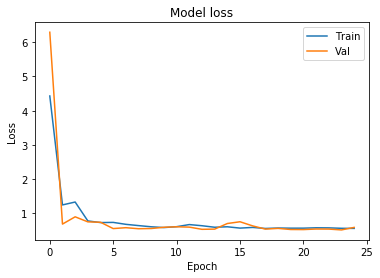

In [43]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

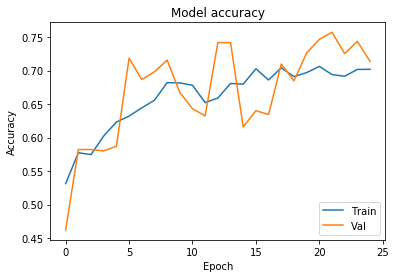

In [44]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [45]:
model_3 = Sequential([
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [46]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=22,
          validation_data=(X_val, Y_val))

Train on 4825 samples, validate on 1034 samples
Epoch 1/22
4825/4825 [==============================] - 1s 275us/sample - loss: 12.8276 - acc: 0.5103 - val_loss: 4.2098 - val_acc: 0.5619
Epoch 2/22
4825/4825 [==============================] - 1s 188us/sample - loss: 5.3372 - acc: 0.4999 - val_loss: 3.9210 - val_acc: 0.6702
Epoch 3/22
4825/4825 [==============================] - 1s 189us/sample - loss: 4.2003 - acc: 0.5127 - val_loss: 3.7146 - val_acc: 0.5542
Epoch 4/22
4825/4825 [==============================] - 1s 188us/sample - loss: 3.7452 - acc: 0.5032 - val_loss: 3.5157 - val_acc: 0.5561
Epoch 5/22
4825/4825 [==============================] - 1s 187us/sample - loss: 3.5094 - acc: 0.4918 - val_loss: 3.3320 - val_acc: 0.5648
Epoch 6/22
4825/4825 [==============================] - 1s 192us/sample - loss: 3.2807 - acc: 0.5098 - val_loss: 3.1596 - val_acc: 0.5542
Epoch 7/22
4825/4825 [==============================] - 1s 188us/sample - loss: 3.0951 - acc: 0.5136 - val_loss: 2.9936 - v

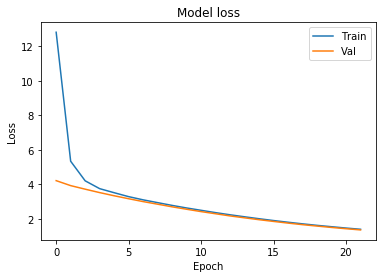

In [47]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.ylim(top=1.2, bottom=0)
plt.show()

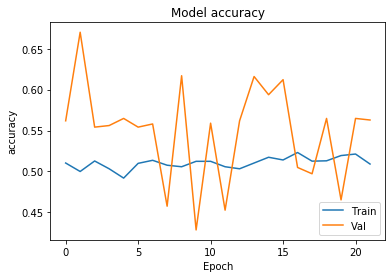

In [48]:
plt.plot(hist_3.history['acc'])
plt.plot(hist_3.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [49]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.00000000e+00, 2.95774648e-01, 4.94505495e-01, 3.83333333e-01,
        6.00000000e-01, 6.71428571e-01],
       [2.67236772e-04, 4.08450704e-01, 4.06593407e-01, 4.33333333e-01,
        6.00000000e-01, 6.00000000e-01],
       [5.34473544e-04, 2.95774648e-01, 3.07692308e-01, 4.83333333e-01,
        5.60000000e-01, 7.42857143e-01],
       ...,
       [9.47087119e-01, 2.81690141e-01, 3.29670330e-01, 5.66666667e-01,
        7.40000000e-01, 3.28571429e-01],
       [7.34901122e-02, 5.49295775e-01, 2.85714286e-01, 3.83333333e-01,
        9.20000000e-01, 3.85714286e-01],
       [2.35702833e-01, 5.63380282e-01, 3.84615385e-01, 6.33333333e-01,
        2.60000000e-01, 5.00000000e-01]])

In [50]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [51]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [52]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [53]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy(name='accuracy'),
              keras.metrics.Precision(name='precision'),
              keras.metrics.Recall(name='recall'),
               tf.keras.metrics.AUC(name='auc')])

In [54]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=20,
          validation_data=(X_val, Y_val),
          )

Train on 4825 samples, validate on 1034 samples
Epoch 1/20
4825/4825 [==============================] - 1s 236us/sample - loss: 0.6990 - accuracy: 0.5134 - precision: 0.6342 - recall: 0.0674 - auc: 0.5011 - val_loss: 0.6956 - val_accuracy: 0.5368 - val_precision: 0.6268 - val_recall: 0.1728 - val_auc: 0.4842
Epoch 2/20
4825/4825 [==============================] - 1s 182us/sample - loss: 0.6930 - accuracy: 0.5248 - precision: 0.5413 - recall: 0.3364 - auc: 0.5199 - val_loss: 0.6935 - val_accuracy: 0.5010 - val_precision: 0.4988 - val_recall: 0.3942 - val_auc: 0.5050
Epoch 3/20
4825/4825 [==============================] - 1s 170us/sample - loss: 0.6920 - accuracy: 0.5262 - precision: 0.5261 - recall: 0.5457 - auc: 0.5361 - val_loss: 0.6929 - val_accuracy: 0.5106 - val_precision: 0.5086 - val_recall: 0.5146 - val_auc: 0.5084
Epoch 4/20
4825/4825 [==============================] - 1s 169us/sample - loss: 0.6916 - accuracy: 0.5343 - precision: 0.5300 - recall: 0.6223 - auc: 0.5447 - val_los

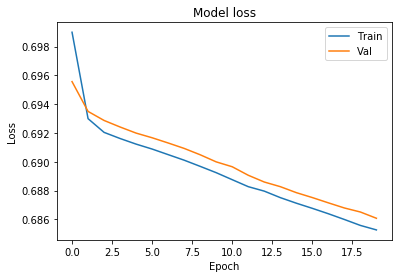

In [55]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

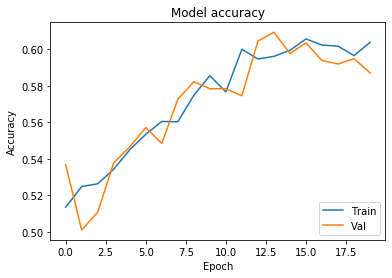

In [56]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [57]:
model_2 = Sequential([
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(6,)),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(150, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [58]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=22,
          validation_data=(X_val, Y_val))

Train on 4825 samples, validate on 1034 samples
Epoch 1/22
4825/4825 [==============================] - 1s 289us/sample - loss: 1.9865 - acc: 0.4976 - val_loss: 0.7796 - val_acc: 0.5019
Epoch 2/22
4825/4825 [==============================] - 1s 190us/sample - loss: 0.7111 - acc: 0.4945 - val_loss: 0.6938 - val_acc: 0.4981
Epoch 3/22
4825/4825 [==============================] - 1s 192us/sample - loss: 0.6934 - acc: 0.4966 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 4/22
4825/4825 [==============================] - 1s 193us/sample - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 5/22
4825/4825 [==============================] - 1s 190us/sample - loss: 0.6932 - acc: 0.4893 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 6/22
4825/4825 [==============================] - 1s 194us/sample - loss: 0.6932 - acc: 0.4931 - val_loss: 0.6932 - val_acc: 0.4981
Epoch 7/22
4825/4825 [==============================] - 1s 192us/sample - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6932 - va

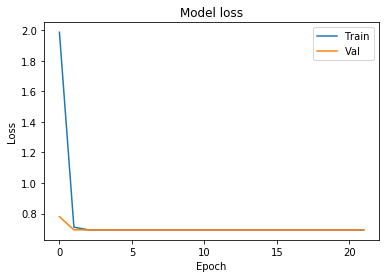

In [59]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

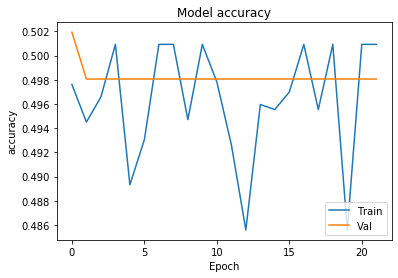

In [60]:
plt.plot(hist_2.history['acc'])
plt.plot(hist_2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [61]:
model_3 = Sequential([
    Dense(100, activation='relu', input_shape=(6,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[keras.metrics.BinaryAccuracy(name='accuracy'),
              keras.metrics.Precision(name='precision'),
              keras.metrics.Recall(name='recall'),
               tf.keras.metrics.AUC(name='auc')])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=25,
          validation_data=(X_val, Y_val))

Train on 4825 samples, validate on 1034 samples
Epoch 1/25
4825/4825 [==============================] - 1s 296us/sample - loss: 0.6820 - accuracy: 0.5621 - precision: 0.5581 - recall: 0.6036 - auc: 0.5927 - val_loss: 0.6545 - val_accuracy: 0.6112 - val_precision: 0.6037 - val_recall: 0.6388 - val_auc: 0.6794
Epoch 2/25
4825/4825 [==============================] - 1s 198us/sample - loss: 0.6140 - accuracy: 0.6543 - precision: 0.6466 - recall: 0.6835 - auc: 0.7193 - val_loss: 0.5729 - val_accuracy: 0.7050 - val_precision: 0.7549 - val_recall: 0.6039 - val_auc: 0.7867
Epoch 3/25
4825/4825 [==============================] - 1s 202us/sample - loss: 0.5268 - accuracy: 0.7378 - precision: 0.7207 - recall: 0.7782 - auc: 0.8105 - val_loss: 0.5191 - val_accuracy: 0.7311 - val_precision: 0.7274 - val_recall: 0.7359 - val_auc: 0.8161
Epoch 4/25
4825/4825 [==============================] - 1s 198us/sample - loss: 0.4867 - accuracy: 0.7650 - precision: 0.7440 - recall: 0.8093 - auc: 0.8409 - val_los

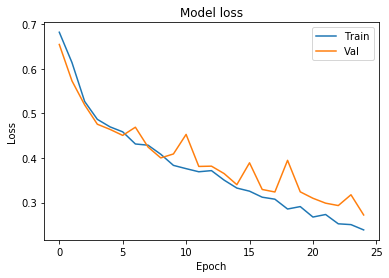

In [62]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

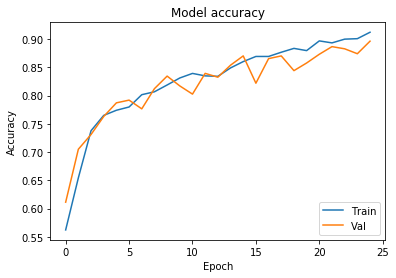

In [63]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()